In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Nutrient Composition Dataset.csv')

In [ ]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [ ]:
df.iloc[:,1:5].describe()

,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000
mean,0.922470,0.900091,0.900146,0.900830
std,0.627128,0.634617,0.623847,0.626875
min,0.000128,0.000267,0.000029,0.002579
25%,0.435853,0.394784,0.419103,0.389124
50%,0.813025,0.804687,0.796290,0.820783
75%,1.295106,1.298988,1.280870,1.295732
max,4.016890,3.979364,4.013322,3.570331


In [ ]:
data=df.iloc[:,1:5]

In [ ]:
data.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
wardlink= linkage(data, method='ward')

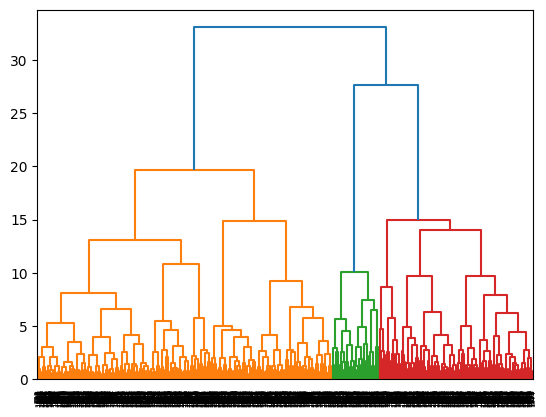

In [ ]:
dend=dendrogram(wardlink)

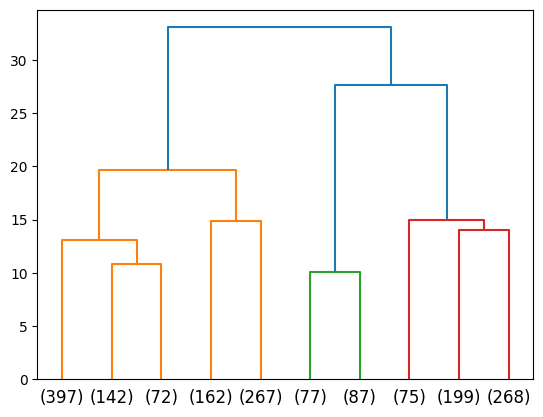

In [ ]:
dend=dendrogram(wardlink,
               truncate_mode='lastp',
               p=10,
)

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
#Method 1
cluster= fcluster(wardlink, 3, criterion='maxclust')
cluster

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [ ]:
#Method 2
cluster=fcluster(wardlink, 23, criterion='distance')
cluster

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [ ]:
df['clusters']= cluster

In [ ]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product,clusters
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",1
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",2
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",1
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",1


In [ ]:
df.to_csv('hc.csv')

### Code Summary

The code above performs hierarchical clustering on a dataset containing nutrient composition information.

1.  **Load Data**: The code starts by loading the data from the 'Nutrient Composition Dataset.csv' file into a pandas DataFrame.
2.  **Select Data**: It then selects the columns related to nutrient composition (Protein, Fat, vitaminC, Fibre) for clustering.
3.  **Hierarchical Clustering**: The `linkage` function from `scipy.cluster.hierarchy` is used to perform hierarchical clustering with the 'ward' method. This method minimizes the variance of the clusters being merged.
4.  **Dendrograms**: Dendrograms are plotted to visualize the clustering process. One dendrogram shows all clusters, while the other is truncated to show the last 10 merged clusters for better readability.
5.  **Assign Clusters**: The `fcluster` function is used to assign data points to clusters based on the hierarchical clustering results. Two methods are shown:
    *   Specifying the maximum number of clusters (`maxclust=3`).
    *   Specifying the maximum distance between clusters (`distance=23`).
6.  **Add Clusters to DataFrame**: The assigned cluster labels are added as a new column named 'clusters' to the original DataFrame.
7.  **Save Results**: Finally, the DataFrame with the added cluster information is saved to a new CSV file named 'hc.csv'.

In essence, the code groups similar food items based on their protein, fat, vitamin C, and fiber content using hierarchical clustering.